In [1]:
from scipy.stats import qmc
import numpy as np
import xarray as xr
import csv
import pandas as pd
import os
import netCDF4 as nc4
import sys
from tempfile import TemporaryFile                                                                                                                                 
import argparse                                                                                                                                                     
import shutil                                                                                                                                                       
import tempfile 
import random

#import functions_py.modp as mp
#import fates_xarray_functions as fa

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import cm
import matplotlib.colors as mcolors
from matplotlib.colors import Normalize

dark = cm.get_cmap('Paired', 12)
colormap = dark(range(12))
colormap[10] = colormap[11]

import functions_py.fates_xarray_functions as fa

/global/homes/j/jneedham/.conda/envs/myenv/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# this function takes data that has monthly values and returns a single annual value, with 
# a mean that accounts for the number of days per month
def monthly_to_annual(array):
    """ calculate annual mean from monthly data, using unequal month lengths for noleap calendar.  
    originally written by Keith Lindsay."""
    mon_day  = xr.DataArray(np.array([31.,28.,31.,30.,31.,30.,31.,31.,30.,31.,30.,31.]), dims=['month'])
    mon_wgt  = mon_day/mon_day.sum()
    return (array.rolling(time=12, center=False) # rolling
            .construct("month") # construct the array
            .isel(time=slice(11, None, 12)) # slice so that the first element is [1..12], second is [13..24]
            .dot(mon_wgt, dims=["month"]))

### BCI 

In [3]:
ninst=7

fates_runs = []

for i in range(1,ninst+1):
    fates_tmp = '/pscratch/sd/j/jneedham/elm_runs/dben/sims2024/bci_p0_{0}.Ef14a3cf738-F2c2f3f10.2024-06-23/run/bci_p0_{0}.Ef14a3cf738-F2c2f3f10.2024-06-23.sofar.nc'.format(i)
    fates_runs.append(xr.open_dataset(fates_tmp, decode_times=False))
    print(i)

1
2
3
4
5
6
7


6.666666666666667
6.75
7.166666666666667
7.833333333333333
8.666666666666666
9.583333333333334
10.416666666666666


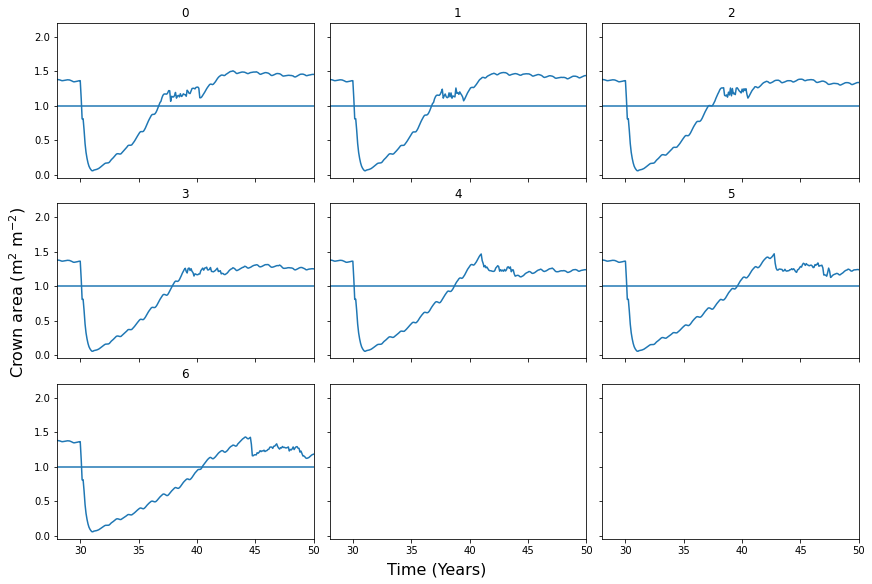

In [4]:
fig1, axs = plt.subplots(nrows=3,ncols=3, figsize=(12,8), constrained_layout=True, sharex=True, sharey=True)
axs=axs.flatten()

for  i in range(0,ninst):
    time = fates_runs[i].variables['time'] / 365.
    CA = np.squeeze(fates_runs[i].FATES_CROWNAREA_PF.isel(fates_levpft=slice(0,3)).sum(dim='fates_levpft'))
    
    
    canopy_close = np.squeeze(np.where(CA[360:] > 1))
    print(canopy_close[1]/12)
    

    axs[i].plot(time, CA)  
    axs[i].axhline(y=1)
    axs[i].set_title(i)
    axs[i].set_xlim(28,50)
    
fig1.supxlabel(r'Time (Years)', fontsize=16)
fig1.supylabel(r'Crown area (m$^{2}$ m$^{-2}$)', fontsize=16)

plt.savefig('/global/homes/j/jneedham/DBEN_cbudget_2024/BCI_canopy_closure.pdf', 
            bbox_inches='tight', facecolor='white')  

### BIA 

In [5]:
ninst=7

fates_runs = []

for i in range(1,ninst+1):
    fates_tmp = '/pscratch/sd/j/jneedham/elm_runs/dben/sims2024/bia_p0_{0}.Ef14a3cf738-F14030960.2024-07-12/run/bia_p0_{0}.Ef14a3cf738-F14030960.2024-07-12.sofar.nc'.format(i)
    fates_runs.append(xr.open_dataset(fates_tmp, decode_times=False))
    print(i)

1
2
3
4
5
6
7


i 0 years 20.583333333333332
i 1 years 22.75


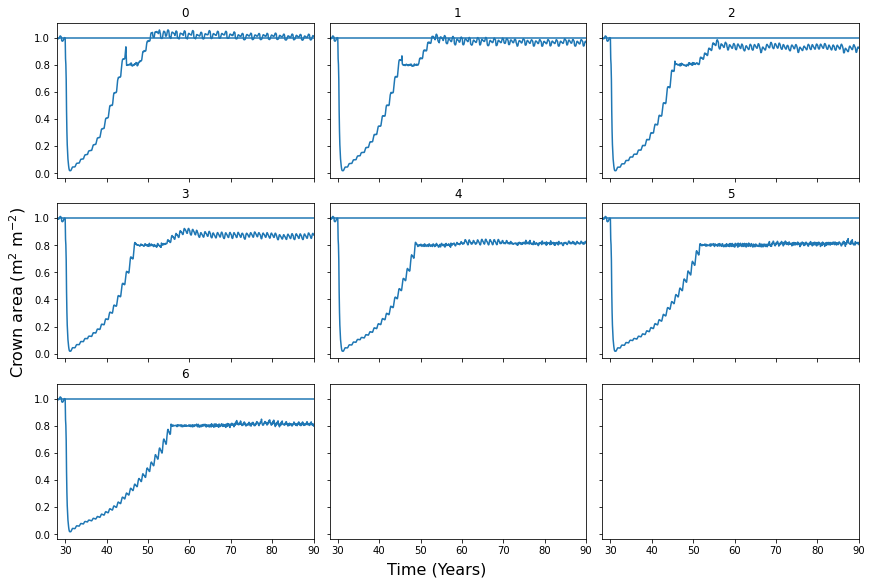

In [6]:
fig1, axs = plt.subplots(nrows=3,ncols=3, figsize=(12,8), constrained_layout=True, sharex=True, sharey=True)
axs=axs.flatten()

for  i in range(0,ninst):
    time = fates_runs[i].variables['time'] / 365.
    CA = np.squeeze(fates_runs[i].FATES_CROWNAREA_PF.isel(fates_levpft=slice(0,3)).sum(dim='fates_levpft'))
    
    
    canopy_close = np.squeeze(np.where(CA[360:] > 1))
    if canopy_close.size > 0 : 
        
        print('i', i, 'years', canopy_close[1]/12)
    

    axs[i].plot(time, CA)  
    axs[i].axhline(y=1)
    axs[i].set_title(i)
    axs[i].set_xlim(28,90)
    
fig1.supxlabel(r'Time (Years)', fontsize=16)
fig1.supylabel(r'Crown area (m$^{2}$ m$^{-2}$)', fontsize=16)

plt.savefig('/global/homes/j/jneedham/DBEN_cbudget_2024/BIA_canopy_closure.pdf', 
            bbox_inches='tight', facecolor='white')  

### FI 

In [7]:
ninst=7

fates_runs = []

for i in range(1,ninst+1):
    fates_tmp = '/pscratch/sd/j/jneedham/elm_runs/dben/sims2024/fi_p0_{0}.Ef14a3cf738-F14030960.2024-07-12/run/fi_p0_{0}.Ef14a3cf738-F14030960.2024-07-12.sofar.nc'.format(i)
    fates_runs.append(xr.open_dataset(fates_tmp, decode_times=False))
    print(i)

1
2
3
4
5
6
7


i 0 years 48.333333333333336
i 1 years 56.5
i 2 years 69.33333333333333
i 3 years 86.41666666666667
i 4 years 114.5
i 5 years 167.41666666666666
i 6 years 310.4166666666667


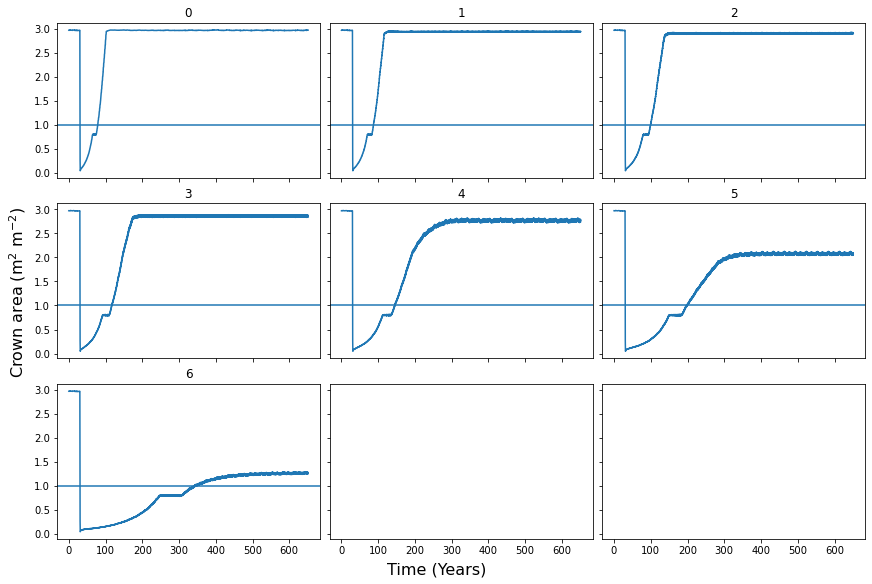

In [8]:
fig1, axs = plt.subplots(nrows=3,ncols=3, figsize=(12,8), constrained_layout=True, sharex=True, sharey=True)
axs=axs.flatten()

for  i in range(0,ninst):
    time = fates_runs[i].variables['time'] / 365.
    CA = np.squeeze(fates_runs[i].FATES_CROWNAREA_PF.isel(fates_levpft=slice(0,3)).sum(dim='fates_levpft'))
    
    
    canopy_close = np.squeeze(np.where(CA[362:] > 1))
    if canopy_close.size > 0 : 
        
        print('i', i, 'years', canopy_close[1]/12)

    axs[i].plot(time, CA)  
    axs[i].axhline(y=1)
    axs[i].set_title(i)
    #axs[i].set_xlim(28,90)
    
fig1.supxlabel(r'Time (Years)', fontsize=16)
fig1.supylabel(r'Crown area (m$^{2}$ m$^{-2}$)', fontsize=16)

plt.savefig('/global/homes/j/jneedham/DBEN_cbudget_2024/FI_canopy_closure.pdf', 
            bbox_inches='tight', facecolor='white')  
